In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
train = pd.read_csv('Titanic/train.csv')

In [4]:
display(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df = train.copy()
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [6]:
for col in df.columns.values:
    unique_vals = pd.unique(df[col].astype(str))
    print('\n '+col+ ' is of data type ' + str(df[col].dtypes)+ ', has '+ str(len(unique_vals)) + ' unique values, and ' + str(df[col].isnull().sum()) + ' null values')

    if len(unique_vals) < 10:
        print(unique_vals)


 Survived is of data type int64, has 2 unique values, and 0 null values
['0' '1']

 Pclass is of data type int64, has 3 unique values, and 0 null values
['3' '1' '2']

 Sex is of data type object, has 2 unique values, and 0 null values
['male' 'female']

 Age is of data type float64, has 89 unique values, and 177 null values

 SibSp is of data type int64, has 7 unique values, and 0 null values
['1' '0' '3' '4' '2' '5' '8']

 Parch is of data type int64, has 7 unique values, and 0 null values
['0' '1' '2' '5' '3' '4' '6']

 Fare is of data type float64, has 248 unique values, and 0 null values

 Cabin is of data type object, has 148 unique values, and 687 null values

 Embarked is of data type object, has 4 unique values, and 2 null values
['S' 'C' 'Q' 'nan']


In [7]:
df['Cabin'] = df['Cabin'].fillna(0)
df['Cabin'] = df['Cabin'].apply(lambda x: 1 if x != 0 else 0)

In [8]:
common = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(common)

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
dtype: int64

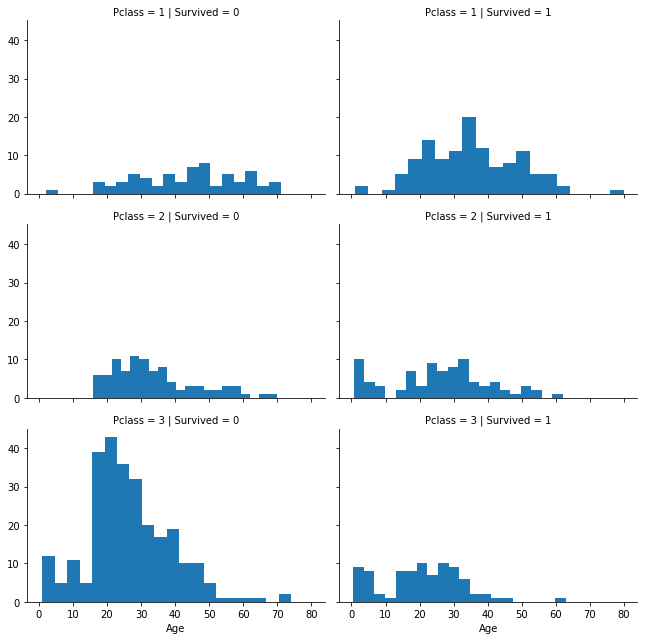

In [10]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size= 3, aspect= 1.5)
grid.map(plt.hist, 'Age', alpha=1, bins = 20)
grid.add_legend();

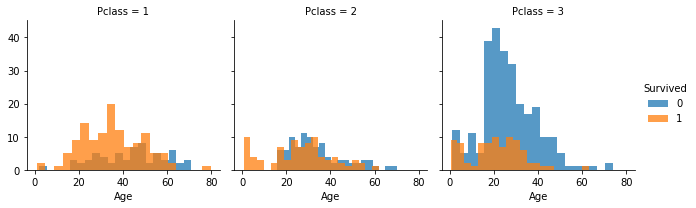

In [11]:
grid = sns.FacetGrid(df, col= 'Pclass', hue='Survived')
grid.map(plt.hist, 'Age', alpha= 0.75, bins=20)
grid.add_legend();

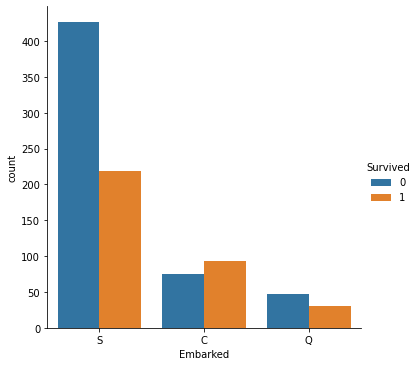

In [12]:
sns.catplot(x='Embarked', hue='Survived', kind='count', data=df)

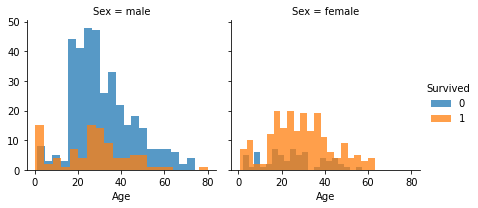

In [13]:
grid = sns.FacetGrid(df, col='Sex', hue='Survived')
grid.map(plt.hist, 'Age', alpha=0.75, bins=20)
grid.add_legend();

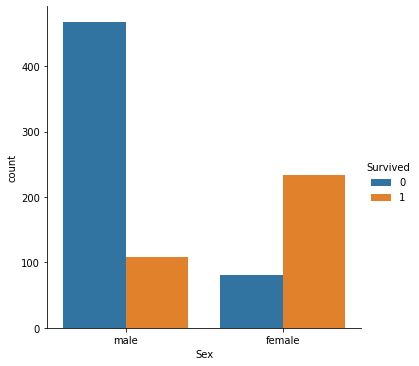

In [14]:
sns.catplot(x='Sex', hue='Survived', kind='count', data=df);

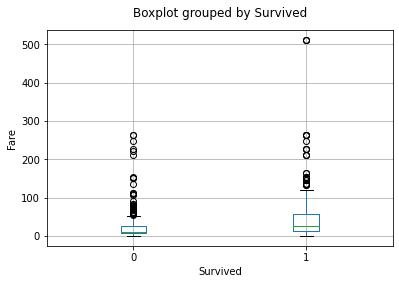

In [15]:
df.boxplot(by='Survived', column='Fare', grid=True);
plt.ylabel('Fare')
plt.title('')
plt.show()

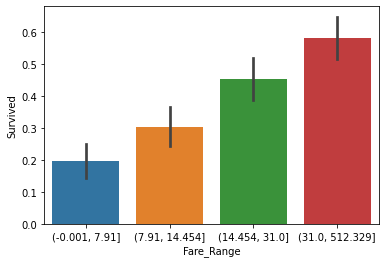

In [16]:
df['Fare_Range'] = pd.qcut(df['Fare'], 4)
sns.barplot(x='Fare_Range', y = 'Survived', data = df);
df = df.drop('Fare_Range', axis=1)

In [17]:
median_cabin_age = df['Age'][df.Cabin == 1].median()
median_non_cabin_age = df.Age[df.Cabin == 0].median()
df.Age[df.Cabin == 1] = df.Age[df.Cabin == 1].fillna(median_cabin_age)
df.Age[df.Cabin == 0] = df.Age[df.Cabin == 0].fillna(median_non_cabin_age)

In [18]:
# One hot encoding for categorical data 
d1 = pd.get_dummies(df.Sex)
d2 = pd.get_dummies(df.Embarked)

In [19]:
df = pd.concat([df.drop(['Sex', 'Embarked'], axis=1), d1.drop('female', axis=1), d2.drop('C', axis=1)], axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


In [20]:
X = df.drop('Survived', axis='columns')
y = df.Survived

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc_train = StandardScaler()
sc_test = StandardScaler()
X_train = sc_train.fit_transform(x_train)
X_test = sc_test.fit_transform(x_test)

In [23]:
from sklearn.metrics import classification_report

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
predictions = model.predict(X_test)
print(classification_report(predictions, y_test))

0.8100558659217877
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       116
           1       0.71      0.78      0.74        63

    accuracy                           0.81       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.82      0.81      0.81       179



In [25]:
cm = confusion_matrix(y_test.astype(int), predictions)
print(cm)

[[96 14]
 [20 49]]
